In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv("data")

In [6]:
data.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
data.shape

(1000, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [9]:
data.isnull().sum()

Unnamed: 0      0
WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [10]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != "O"]
numerical_features

['Unnamed: 0',
 'WTT',
 'PTI',
 'EQW',
 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ',
 'TARGET CLASS']

In [11]:
discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 25]
discrete_features

['TARGET CLASS']

In [12]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
continuous_features

['Unnamed: 0',
 'WTT',
 'PTI',
 'EQW',
 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ']

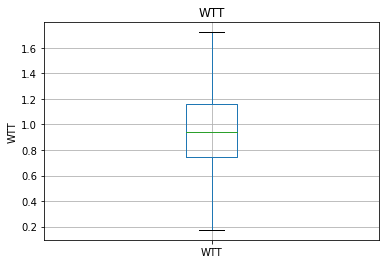

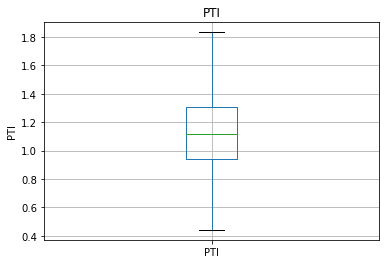

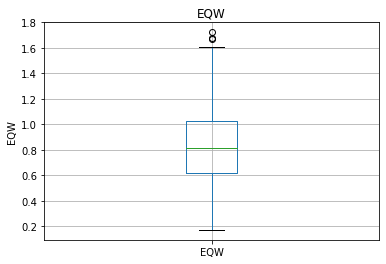

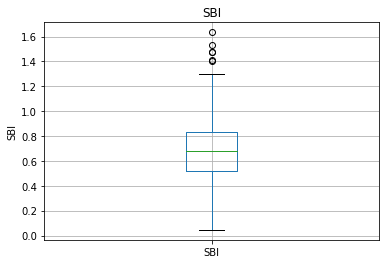

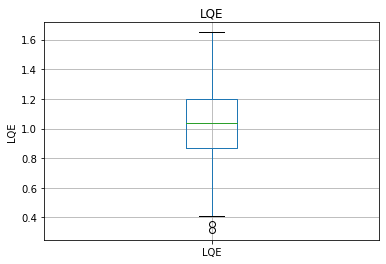

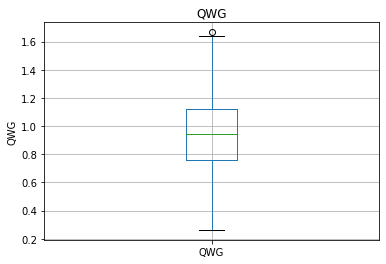

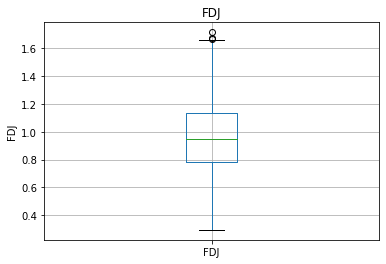

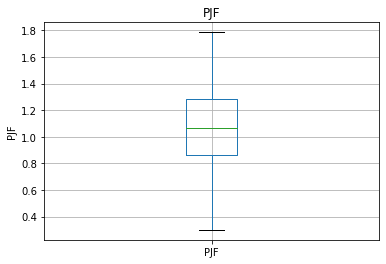

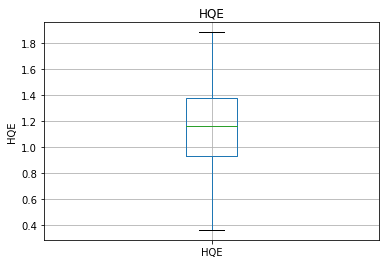

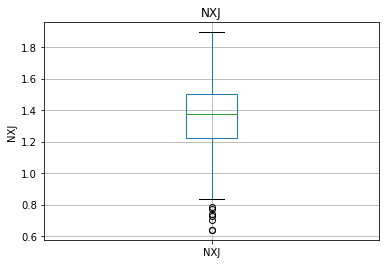

In [16]:
for feature in continuous_features:
    data1 = data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        #data1[feature] = np.log(data1[feature])
        data1.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Feature Scaling

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(data.drop(["TARGET CLASS"], axis=1))

StandardScaler()

In [20]:
scaled_features = scaler.transform(data.drop(["TARGET CLASS"], axis=1))

In [21]:
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])

In [22]:
data_scaled

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,1.719927,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,1.723391,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,1.726856,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [23]:
data["TARGET CLASS"].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data_scaled, data["TARGET CLASS"], test_size=0.3)

## KNN

 We'll start with k=1.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
pred = knn.predict(x_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [31]:
print(confusion_matrix(y_test, pred))

[[128  18]
 [ 18 136]]


In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       146
           1       0.88      0.88      0.88       154

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



### Choosing K value

elbow method to pick a good K Value

In [33]:
accuracy_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, data_scaled, data["TARGET CLASS"], cv=10)
    accuracy_rate.append(score.mean())

In [36]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, data_scaled, data["TARGET CLASS"], cv=10)
    error_rate.append(1-score.mean())
error_rate

[0.10799999999999998,
 0.10400000000000009,
 0.08500000000000019,
 0.08099999999999985,
 0.08399999999999996,
 0.07300000000000006,
 0.07099999999999995,
 0.061999999999999944,
 0.06499999999999984,
 0.06600000000000006,
 0.06799999999999995,
 0.06299999999999994,
 0.06699999999999995,
 0.06899999999999995,
 0.06699999999999995,
 0.06699999999999995,
 0.06500000000000006,
 0.06500000000000006,
 0.06499999999999984,
 0.06600000000000006,
 0.06600000000000006,
 0.06299999999999994,
 0.062000000000000055,
 0.061000000000000165,
 0.06500000000000017,
 0.062000000000000055,
 0.06499999999999984,
 0.06099999999999994,
 0.06500000000000006,
 0.061999999999999944,
 0.06500000000000006,
 0.06299999999999994,
 0.06400000000000006,
 0.061999999999999944,
 0.06299999999999994,
 0.05999999999999983,
 0.06500000000000006,
 0.062000000000000055,
 0.06299999999999994]

In [37]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
error_rate

[0.12,
 0.11,
 0.11333333333333333,
 0.11,
 0.08666666666666667,
 0.09,
 0.07333333333333333,
 0.07666666666666666,
 0.09,
 0.08,
 0.07666666666666666,
 0.08666666666666667,
 0.07666666666666666,
 0.08,
 0.07333333333333333,
 0.07333333333333333,
 0.07,
 0.06666666666666667,
 0.07666666666666666,
 0.07,
 0.06333333333333334,
 0.07,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.06,
 0.06,
 0.056666666666666664,
 0.06,
 0.06,
 0.06333333333333334,
 0.06666666666666667,
 0.07333333333333333,
 0.07333333333333333,
 0.07666666666666666,
 0.08,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666]

Text(0, 0.5, 'Error Rate')

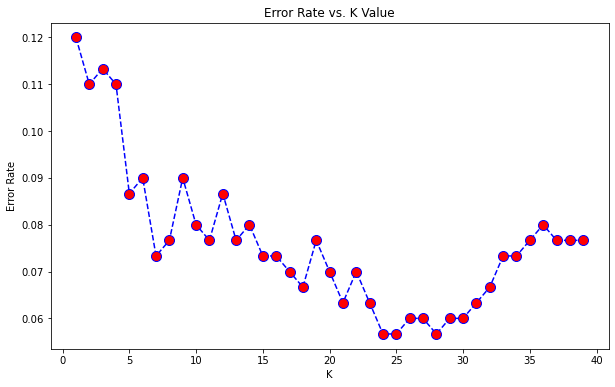

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
# NOW WITH K=24
knn = KNeighborsClassifier(n_neighbors=24)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=24')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=24


[[137   9]
 [  8 146]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       146
           1       0.94      0.95      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

